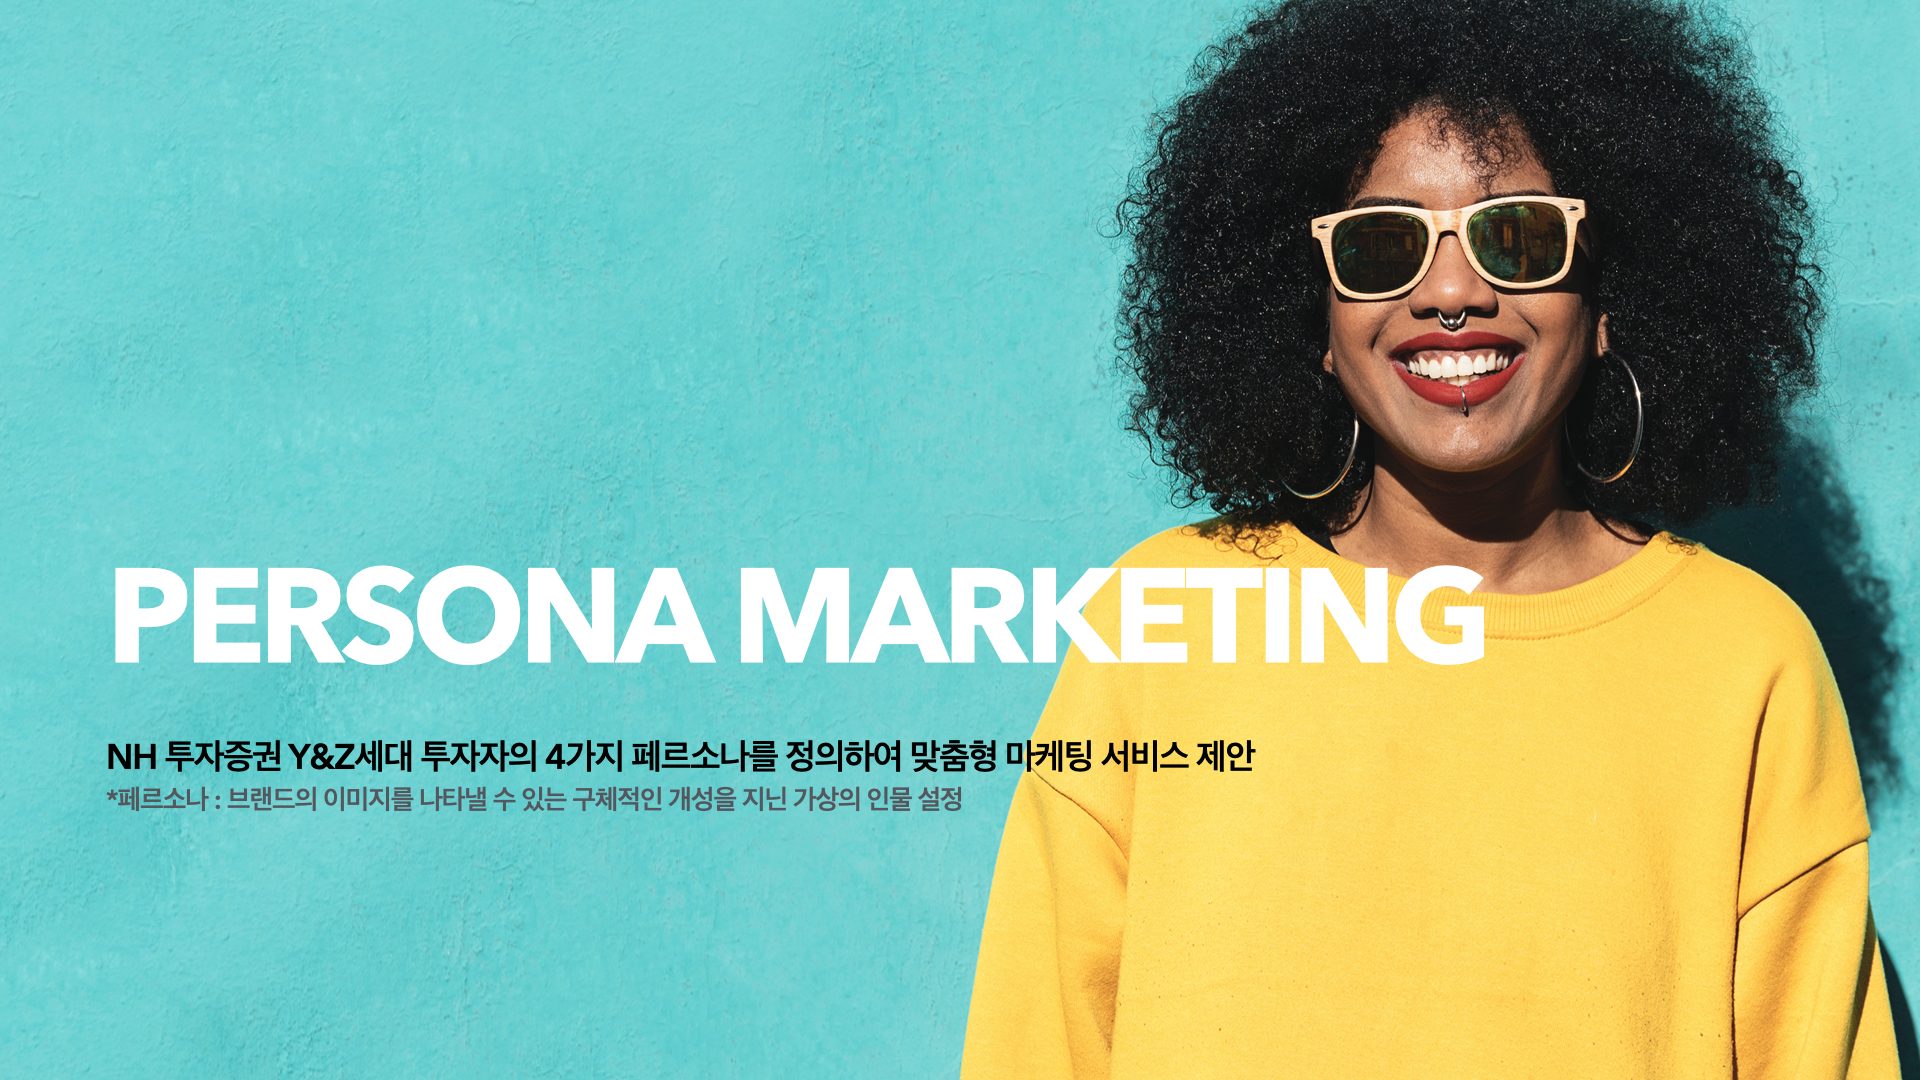

In [9]:
Image('메인1.jpeg')

# 0. Import library

In [19]:
import pandas as pd
import numpy as np
from datetime import date, timedelta

import pyecharts
from pyecharts import *
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import Image
from pyecharts import online
online()

import sklearn as sk
from sklearn import preprocessing
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

# 1. EDA

"*너 OOO 주식 봤어? 어제 살 걸 그랬나..*"
<br>
<br>요즘 사람들의 대화는 주식 현황으로 시작하는 경우가 많습니다. 유튜브 등 각종 포털에서는 주식을 시작하는 '주린이(주식+어린이의 합성어)'를 위한 강의들이 계속해서 생겨나고 있고, 어떤 그룹이 상장했다는 사실이 급상승 검색어에 연일 등장하기도 합니다. 
<br><br>저희는 이러한 주식의 유행 속에서 **새롭게 등장한 투자자들은 어떤 성향을 띠고 있는지** 새로운 투자자들에게는 **어떠한 방식으로 접근해야 하는지**에 대한 인사이트를 얻고자 분석에 참여하게 됐습니다.


먼저, 주식의 유행에 대해 <span style="color:DarkBlue">**3가지**</span> 관점에서 바라보았습니다.

<span style="color:DarkBlue">**1. 코로나 19의 발생**<span style="color:DarkBlue"><br>
<span style="color:DarkBlue">**2. 집값의 상승**</span><br>
<span style="color:DarkBlue">**3. 주식에 대한 관심도 증가**</span>

In [11]:
# 코로나 19의 발생
corona = pd.read_csv("kr_daily.csv", parse_dates = ['date'])
corona['date'] = corona['date'].astype(str)

bar = Bar("국내 코로나19 현황", width=900)
bar.add("확진자", corona['date'], corona['confirmed'], label_color = ['#2E4453'])
bar

국내 **코로나바이러스감염증-19(이하 코로나19)** 확진자 누적수를 시각화하였습니다. 

올해 초 중국 우한시에서 시작한 바이러스는 전세계적으로 유행하며 한국에서는 1월 20일 첫 번째 확진자가 발생하였습니다.
이후 코로나19 확산 사태가 장기화되며 지난 3월 경에는 <span style="color:DarkBlue">국내 개인투자자</span>들이 기관과 외국인에 맞서 국내 주식을 대거 사들이면서 반외세 운동인 '동학농민운동'에 빗대 <span style="color:DarkBlue">**'동학개미운동'**</span> 이라는 신조어를 만들어 내기도 했습니다. 

In [12]:
# 집값의 상승
house_info = pd.read_csv('stat_124001.csv', skiprows = (0,1,8,9))
house_info.set_index('Unnamed: 0', inplace=True)
house_info = house_info.T

line = Line("주택매매가격 증가율 추이", width=900)
line.add("전국", house_info.index, house_info['전국'], is_stack=True, is_smooth=True)
line.add("수도권", house_info.index, house_info['수도권'], is_stack=True, is_smooth=True)
line

국토교통부에서 제공하고 있는 **주택매매가격 경향**을 시각화했습니다.

지난 2019년 1월부터 2020년 6월까지 전국 및 수도권을 기준으로, 각 수치는 <span style='color:DarkBlue'>월별 주택 매매가격 증감률</span>을 나타내며 월별로 등락은 있었지만 2019년에 비해 <span style='color:DarkBlue'>**2020년의 주택매매가격이 전반적으로 상승했음**</span>을 보여주고 있습니다. 부동산 가격이 상승하며 은행저축만으로 자산 증축 및 미래설계가 불가능하다 판단된 사람들은 위험을 감수하더라도 높은 수익률을 내는 투자에 관심을 갖게 됐습니다.

In [14]:
# 주식에 대한 관심도 증가
stock_info_web = pd.read_csv('multiTimeline.csv', skiprows = (0,1))
stock_info_youtube = pd.read_csv('multiTimeline (1).csv', skiprows = (0,1))

line = Line("구글 트렌드 검색어: 주식", width=900)
line.add("유튜브", stock_info_youtube['주'], stock_info_youtube['주식: (대한민국)'], is_stack=True, is_smooth=True)
line.add("웹", stock_info_web['주'], stock_info_web['주식: (대한민국)'], is_stack=True, is_smooth=True)
line

구글트렌드 분석에 따르면 2019년 1월부터 2020년 12월 19일까지 <span style='color:DarkBlue'>'주식'이라는 단어에 대한 **웹, 유튜브 검색 지수가 모두 지속해서 상승**</span>하고 있음을 알 수 있습니다. 또한 전세계적으로 코로나19의 유행이 가속화되며 '팬데믹(세계적으로 전염병이 대유행하는 상태)'을 선언한 3월은 가장 큰 관심도를 보이고 있습니다. 

바이러스의 유행과 부동산 가격의 증가 등 사회 변화 속에서 사람들의 주식에 대한 관심도 역시 꾸준히 증가하고 있다고 볼 수 있습니다. 이러한 상황 속에서 **새로운 유행에 가장 관심을 가지고 있는 세대는 어느 연령대 일까?** 하는 의문과 함께 **2020년의 그들은 2019년과 어떻게 다른지**를 분석해보았습니다.

*(중략)*

# 2. Data Pre-Processing

<span style="color:DarkRed">***Git: 보안 이슈로 세부 전처리 내용과 시각화는 생략하였습니다.***</span>

> 1. ERD(데이터 관계)를 기준으로 데이터 병합<br>
> 2. *'국내_해외'*, *'총체결가격'* 컬럼 추가 및 2020년 Y&Z세대 투자자 추출<br>
> 3. 이상치 제거<br>
> 4. *'주식보유일'*, *'수익률'* 파생변수 생성<br>
> 5. 매수/매도 데이터 분리<br>
> 6. 고객번호(unique)를 기준으로 Grouping<br>
> 7. *'체결수량'* 및 *'체결가격'* 범주화

In [ ]:
# 주식보유일
# 고객ID, 주문날짜, 종목명별로 마지막 매도 날짜에서 처음 매수 날짜를 빼서 '주식보유일' 변수를 생성

cus_lst = list(df['고객번호'].unique())

for cus in cus_lst:
    df_query_cus = df[df['고객번호'] == cus]
    
    iem_lst = list(df_query_cus['종목명'].unique())
    for iem in iem_lst:
        df_query_iem = df_query_cus[df_query_cus['종목명'] == iem]
        
        try : 
            매수일 = np.array(list(df_query_iem.query('매매구분코드==2')['주문날짜'])).min()
        except:
            break
        try:
            매도일 = np.array(list(df_query_iem.query('매매구분코드==1')['주문날짜'])).max()
        except:
            break
        
        보유일 = 매도일 - 매수일
        df_주식보유일 = pd.concat([df_주식보유일, pd.DataFrame({'고객번호':[cus], '종목명':[iem], '보유일':[보유일]})])

In [ ]:
# 수익률
# 고객ID, 종목명별로 매도 가격에서 매수 가격을 빼서 '수익률' 변수를 생성

cus_lst = list(df['고객번호'].unique())

for cus in cus_lst:
    df_query_cus = df[df['고객번호'] == cus]
    
    iem_lst = list(df_query_cus['종목명'].unique())
    for iem in iem_lst:
        df_query_iem = df_query_cus[df_query_cus['종목명'] == iem]
        
        try : 
            매수가격 = np.array(list(df_query_iem.query('매매구분코드==2')['총체결가격'])).min()
        except:
            break
        try:
            매도가격 = np.array(list(df_query_iem.query('매매구분코드==1')['총체결가격'])).max()
        except:
            break
        
        profit = (매도가격 / 매수가격 - 1)*100
        df_profit = pd.concat([df_profit, pd.DataFrame({'고객번호':[cus], '종목명':[iem], '수익률':[profit]})])

# 3. 외부 Data

In [15]:
# 코스피, 코스닥, 시가총액 Top50 종목 크롤링
KOSPI50 = pd.read_csv('KOSPI 50_20210118.csv', encoding="utf-8")
KOSDAQ50 = pd.read_csv('KOSDAQ 50_20210118.csv', encoding="utf-8")
MARKET50 = pd.read_csv('Market capitalization top50_20210119.csv', encoding="utf-8")
top50 = pd.concat([KOSPI50, KOSDAQ50, MARKET50]).drop(['index'], axis=1)
top50

종목 한글명          종목코드    업종
0             삼성전자       A005930    IT
1           SK하이닉스       A000660    IT
2             LG화학       A051910    소재
3            삼성전자우       A005935    IT
4         삼성바이오로직스       A207940  건강관리
..             ...           ...   ...
45        Qualcomm  US7475251036   NaN
46         Chevron  US1667641005   NaN
47         Danaher  US2358511028   NaN
48       Accenture  IE00B4BNMY34   NaN
49  Nextera Energy  US65339F1012   NaN

[150 rows x 3 columns]

# 4. Modeling

* **K-Means**
* **GMM**
* **DBSCAN**
* **계층적 클러스터링**
* **Mean Shift**

In [18]:
final_data = pd.read_csv('NH_final_data.csv', index_col=0)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2294 entries, 0 to 2293
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   고객번호            2294 non-null   object 
 1   연령대             2294 non-null   float64
 2   고객등급            2294 non-null   float64
 3   고객투자성향          2294 non-null   float64
 4   sell_국내_해외      2294 non-null   float64
 5   sell_체결수량       2294 non-null   float64
 6   sell_체결가격       2294 non-null   float64
 7   sell_총체결가격      2294 non-null   float64
 8   buy_국내_해외       2294 non-null   float64
 9   buy_체결수량        2294 non-null   float64
 10  buy_체결가격        2294 non-null   float64
 11  buy_총체결가격       2294 non-null   float64
 12  sell_체결수량_구간    2294 non-null   int64  
 13  sell_총체결가격_구간   2294 non-null   int64  
 14  buy_체결수량_구간     2294 non-null   int64  
 15  buy_총체결가격_구간    2294 non-null   int64  
 16  have_date_mean  2294 non-null   float64
 17  profit          2294 non-null   f

In [20]:
# 군집화 데이터프레임 생성
col = ['고객등급', '고객투자성향', 'sell_국내_해외', 'sell_체결수량', 'sell_총체결가격', 'buy_국내_해외', 'buy_체결수량', 'buy_총체결가격', 'have_date_mean', 'profit', 'top50', 'upjong_variety']
group_data = final_data[col]

# 로버스트 스케일 정규화
group_data = group_data.values
group_data = preprocessing.robust_scale(group_data)

## (1) K-Means

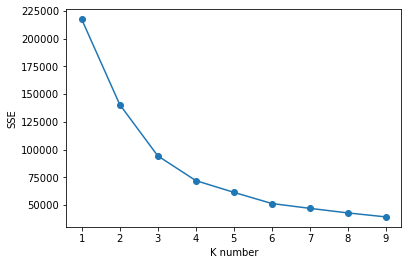

In [21]:
from sklearn.cluster import KMeans

# 적절한 k 찾기
def elbow(X):
    sse = []
    for i in range(1, 10):
        km = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1, 10), sse, marker = 'o')
    plt.xlabel('K number')
    plt.ylabel('SSE')
    plt.show()
    
elbow(group_data)

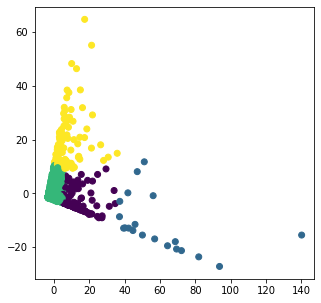

In [24]:
# k=4개로 군집화
group = KMeans(n_clusters = 4)
group.fit(group_data)

centroids = group.cluster_centers_ 
labels = group.labels_
final_data['label'] = labels

# 군집 시각화 (2차원)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components = 2)
fit = pca.fit_transform(group_data)
pca_data = pd.DataFrame(data = fit, columns = ['PC1', 'PC2'])

plt.figure(figsize = (5, 5))
plt.scatter('PC1', 'PC2', data = pca_data, c = final_data['label'])

display()

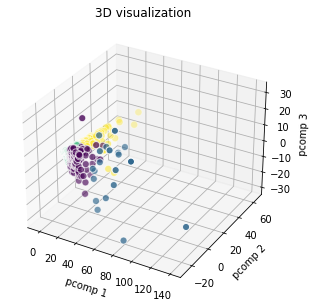

In [27]:
# 군집 시각화 (3차원)
pca3 = PCA(n_components = 3)
data_pca3 = pca3.fit_transform(group_data)

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data_pca3[:,0], data_pca3[:,1], data_pca3[:,2], c = final_data['label'], s = 50, edgecolors = 'white')
ax.set_title('3D visualization')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
plt.show()

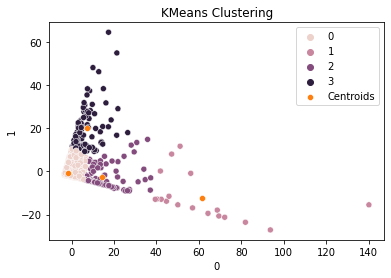

Silhouette Coefficient: 0.7754
Davies Bouldin Index: 0.6436


In [30]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

reduced_df = pd.DataFrame(fit)

km = KMeans(n_clusters = 4, init = 'k-means++')
cluster = km.fit(reduced_df)
cluster_id = pd.DataFrame(cluster.labels_)

d1 = pd.concat([reduced_df, cluster_id], axis = 1)
d1.columns = [0, 1, "cluster"]

sns.scatterplot(d1[0], d1[1], hue = d1['cluster'], legend = "full")
sns.scatterplot(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], label = 'Centroids')
plt.title("KMeans Clustering")
plt.legend()
plt.show()

print('Silhouette Coefficient: {:.4f}'.format(silhouette_score(d1.iloc[:,:-1], d1['cluster'])))
print('Davies Bouldin Index: {:.4f}'.format(davies_bouldin_score(d1.iloc[:,:-1], d1['cluster'])))

In [31]:
final_data['kmeans_label'] = d1['cluster']

## (2) GMM

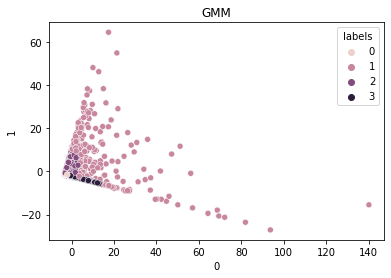

Silhouette Coefficient: 0.2139
Davies Bouldin Index: 1.3036


In [32]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 4).fit(fit)
labels = gmm.predict(fit)

fit_df = pd.DataFrame(fit)
labels_df = pd.DataFrame(labels)
fit_df['labels'] = labels_df[0]

sns.scatterplot(fit_df[0], fit_df[1], hue = fit_df['labels'], legend = "full")
plt.title('GMM')
plt.show()
    
print('Silhouette Coefficient: {:.4f}'.format(silhouette_score(fit_df.iloc[:,:-1], fit_df['labels'])))
print('Davies Bouldin Index: {:.4f}'.format(davies_bouldin_score(fit_df.iloc[:,:-1], fit_df['labels'])))

## (3) DBSCAN

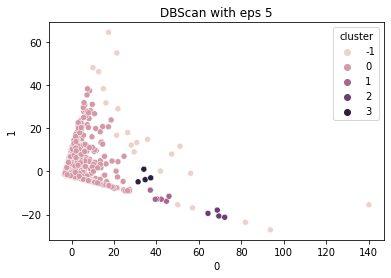

Silhouette Coefficient: 0.8260
Davies Bouldin Index: 1.3417


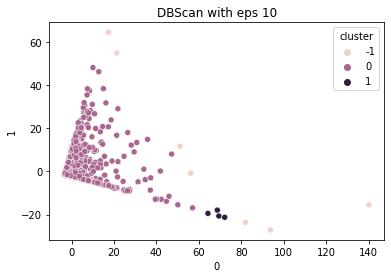

Silhouette Coefficient: 0.9053
Davies Bouldin Index: 1.3878


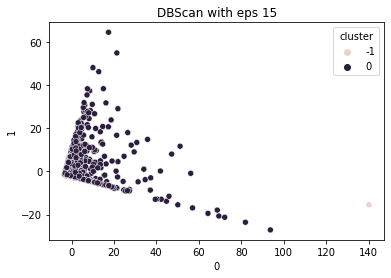

Silhouette Coefficient: 0.9498
Davies Bouldin Index: 0.0346


In [34]:
from sklearn.cluster import DBSCAN

eps = [5, 10, 15]

for i in eps:
    db = DBSCAN(eps = i, min_samples = 4)
    cluster = db.fit(fit)
    cluster_id = pd.DataFrame(cluster.labels_)
    
    d2 = pd.DataFrame()
    d2 = pd.concat([reduced_df, cluster_id], axis=1)
    d2.columns = [0, 1, "cluster"]
    
    sns.scatterplot(d2[0], d2[1], hue = d2['cluster'], legend = "full")
    plt.title('DBScan with eps {}'.format(i))
    plt.show()
    
    print('Silhouette Coefficient: {:.4f}'.format(silhouette_score(d2.iloc[:,:-1], d2['cluster'])))
    print('Davies Bouldin Index: {:.4f}'.format(davies_bouldin_score(d2.iloc[:,:-1], d2['cluster'])))

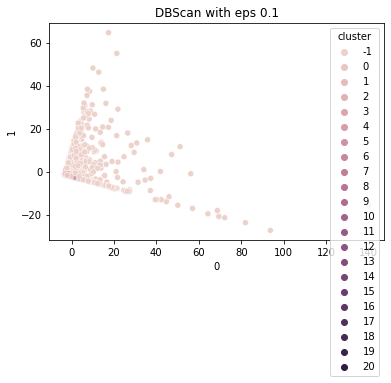

Silhouette Coefficient: -0.1549
Davies Bouldin Index: 1.4271


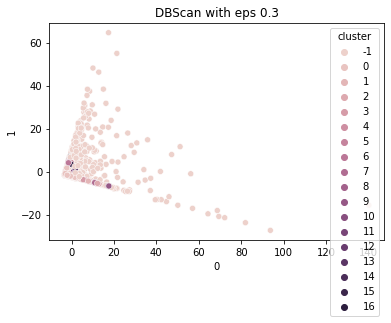

Silhouette Coefficient: 0.1705
Davies Bouldin Index: 1.2959


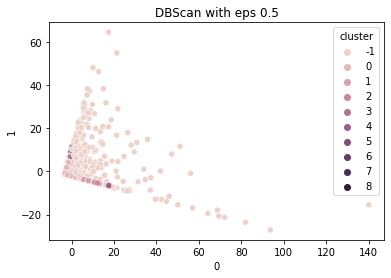

Silhouette Coefficient: 0.5433
Davies Bouldin Index: 1.3027


In [36]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_df = pd.DataFrame(ss.fit_transform(fit))

eps = [0.1, 0.3, 0.5]

for i in eps:
    db = DBSCAN(eps = i, min_samples = 4)
    cluster = db.fit(reduced_df)
    cluster_id = pd.DataFrame(cluster.labels_)
    
    d3 = pd.DataFrame()
    d3 = pd.concat([reduced_df, cluster_id], axis=1)
    d3.columns = [0, 1, "cluster"]
    
    sns.scatterplot(d3[0], d3[1], hue = d3['cluster'], legend = "full")
    plt.title('DBScan with eps {}'.format(i))
    plt.show()
    
    print('Silhouette Coefficient: {:.4f}'.format(silhouette_score(d3.iloc[:,:-1], d3['cluster'])))
    print('Davies Bouldin Index: {:.4f}'.format(davies_bouldin_score(d3.iloc[:,:-1], d3['cluster'])))

## (4) 계층적 클러스터링

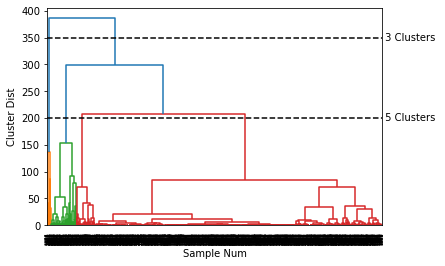

In [40]:
from scipy.cluster.hierarchy import ward, fcluster
from scipy.cluster import hierarchy

linkage_array = ward(fit)
hierarchy.dendrogram(linkage_array)
plt.xlabel("Sample Num")
plt.ylabel("Cluster Dist")

# 클러스터를 구분하는 커트라인 표시
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [350, 350], '--', c='k')
ax.plot(bounds, [200, 200], '--', c='k')
ax.text(bounds[1], 350, ' 3 Clusters ', va = 'center', fontdict = {'size': 10})
ax.text(bounds[1], 200, ' 5 Clusters ', va = 'center', fontdict = {'size': 10})
plt.show()

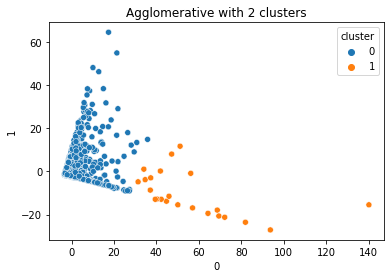

Silhouette Coefficient: 0.8941
Davies Bouldin Index: 0.4386


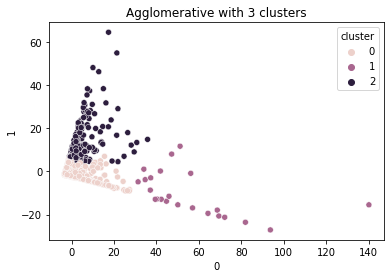

Silhouette Coefficient: 0.7496
Davies Bouldin Index: 0.6756


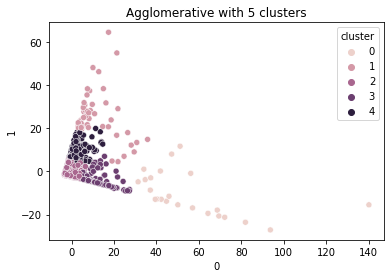

Silhouette Coefficient: 0.7344
Davies Bouldin Index: 0.7009


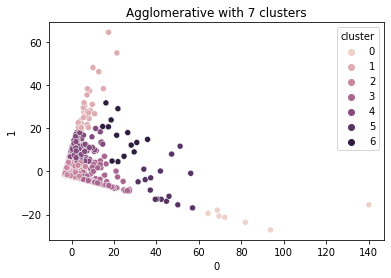

Silhouette Coefficient: 0.7382
Davies Bouldin Index: 0.6956


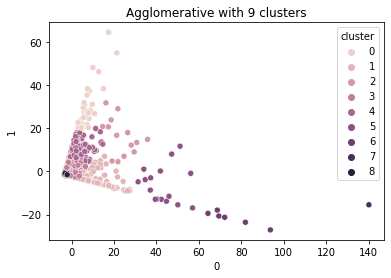

Silhouette Coefficient: 0.5422
Davies Bouldin Index: 0.7261


In [44]:
from sklearn.cluster import AgglomerativeClustering

n = [2, 3, 5, 7, 9]

for i in n:
    agg = AgglomerativeClustering(n_clusters = i)
    cluster = agg.fit(fit)
    cluster_id = pd.DataFrame(cluster.labels_)
    
    d4 = pd.DataFrame()
    d4 = pd.concat([pca_data, cluster_id], axis=1)
    d4.columns = [0, 1, "cluster"]
    
    sns.scatterplot(d4[0], d4[1], hue = d4['cluster'], legend = "full")
    plt.title('Agglomerative with {} clusters'.format(i))
    plt.show()
    
    print('Silhouette Coefficient: {:.4f}'.format(silhouette_score(d4.iloc[:,:-1], d4['cluster'])))
    print('Davies Bouldin Index: {:.4f}'.format(davies_bouldin_score(d4.iloc[:,:-1], d4['cluster'])))

## (5) Mean Shift

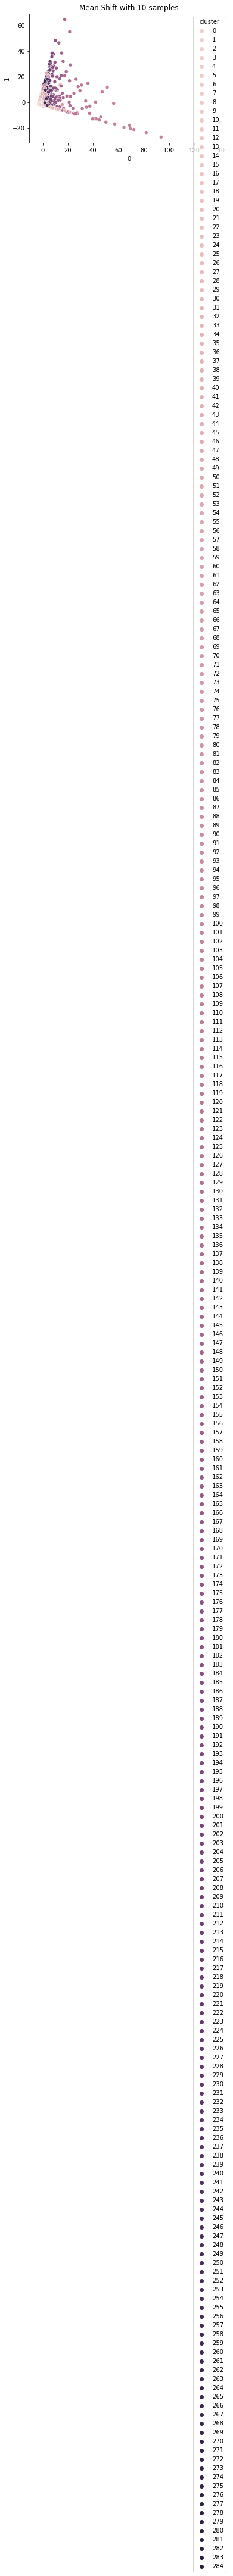

Silhouette Coefficient: 0.4453
Davies Bouldin Index: 0.2523


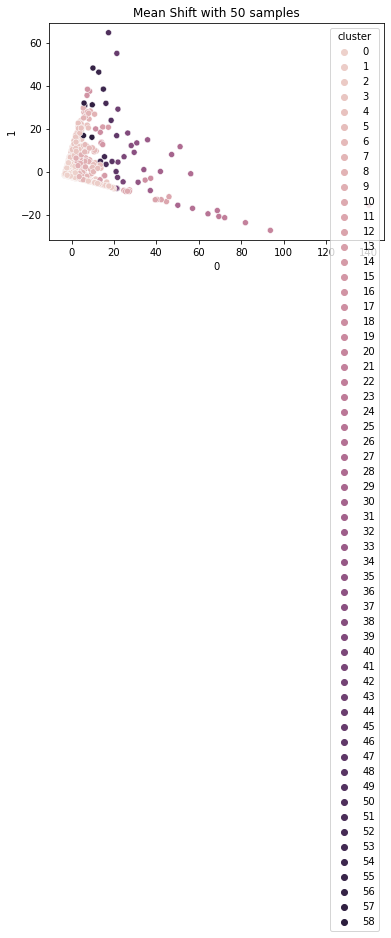

Silhouette Coefficient: 0.6209
Davies Bouldin Index: 0.3528


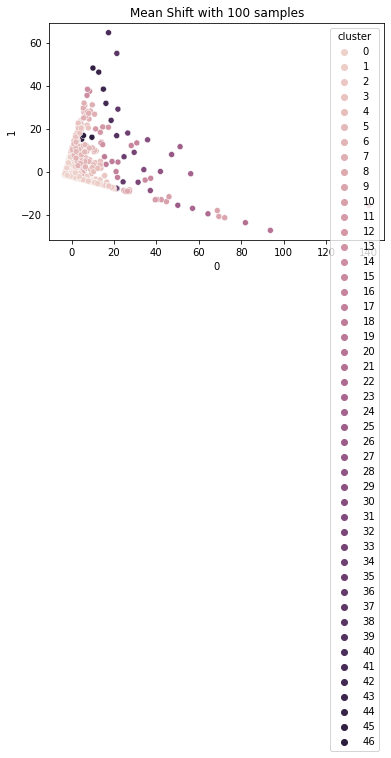

Silhouette Coefficient: 0.6475
Davies Bouldin Index: 0.3822


In [47]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

n = [10, 50, 100]    

for i in n:
    bandwidth = estimate_bandwidth(reduced_df, quantile = 0.2, n_samples = i)
    ms = MeanShift(bandwidth = bandwidth)
    cluster = ms.fit(reduced_df)
    cluster_id = pd.DataFrame(cluster.labels_)

    d6 = pd.DataFrame()
    d6 = pd.concat([reduced_df, cluster_id], axis=1)
    d6.columns = [0, 1, "cluster"]

    sns.scatterplot(d6[0], d6[1], hue = d6['cluster'], legend = "full")
    plt.title('Mean Shift with {} samples'.format(i))
    plt.show()

    print('Silhouette Coefficient: {:.4f}'.format(silhouette_score(d6.iloc[:,:-1], d6['cluster'])))
    print('Davies Bouldin Index: {:.4f}'.format(davies_bouldin_score(d6.iloc[:,:-1], d6['cluster'])))

# 5. Silhouette scores by algorithm

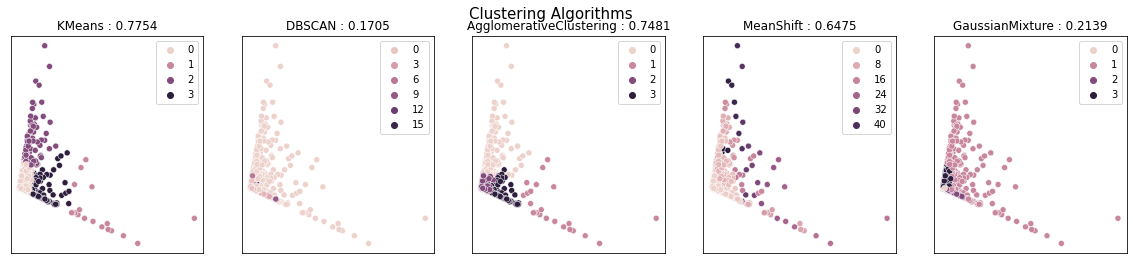

In [48]:
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (20, 4), subplot_kw = {'xticks': (), 'yticks': ()})
fig.suptitle('Clustering Algorithms', fontsize=15)

algorithms = [KMeans(n_clusters = 4, init = 'k-means++'), 
              DBSCAN(eps = 0.3, min_samples = 4),
              AgglomerativeClustering(n_clusters = 4),
              MeanShift(bandwidth = estimate_bandwidth(reduced_df, quantile = 0.2, n_samples = 100)),
              GaussianMixture(n_components = 4)
              ]

for ax, algorithm in zip(axes.flatten(), algorithms):
    clusters = algorithm.fit_predict(reduced_df)
    sns.scatterplot(reduced_df.loc[:, 0], reduced_df.loc[:, 1], hue = clusters, ax = ax)
    ax.set(title = "{} : {:.4f}".format(algorithm.__class__.__name__, silhouette_score(fit, clusters)))

plt.show()

In [49]:
# 크롤링 코드
# 여러 개의 클러스터링 개수를 list로 입력 받아
# 각각의 실루엣 계수를 면적으로 시각화한 함수

def visualize_silhouette(clustering, X_features, cluster_lists = [1]): 
    
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize = (4 * n_cols, 4), nrows = 1, ncols = n_cols)
    
    for ind, n_cluster in enumerate(cluster_lists):
        if clustering[0] == 'hierarchical':
            model = AgglomerativeClustering(n_clusters = n_cluster, linkage = clustering[1])
        elif clustering[0] == 'kmeans':
            model = KMeans(n_clusters = n_cluster)
        
        cluster_labels = model.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster: '+ str(n_cluster)+'\n' \
                          'Silhouette Score: ' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([-1, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor = color, edgecolor = color, alpha = 0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x = sil_avg, color = "red", linestyle = "--")

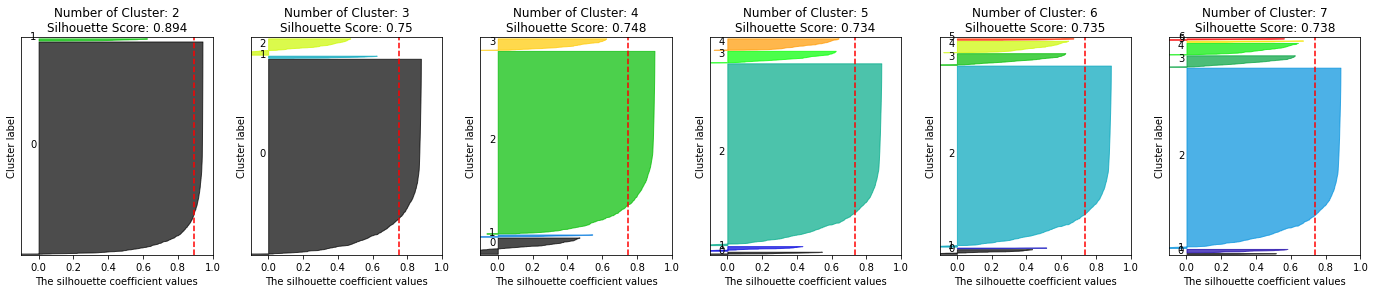

In [50]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import math

visualize_silhouette(['hierarchical', 'ward'], reduced_df, [2, 3, 4, 5, 6, 7])

# 6. Conclusion

* 실루엣 점수가 가장 높은 **K-Means Clustering** 기법을 활용하여 고객군 군집화

# 7. 군집별 대시보드 제작 및 페르소나 정의

* 소심개미 / 내돈내산 / 무한존버 / Y.O.L.O

아래에서는 **Y.O.L.O** 페르소나의 대시보드와 맞춤형 서비스를 제안한 내용을 예시로 보여드립니다.

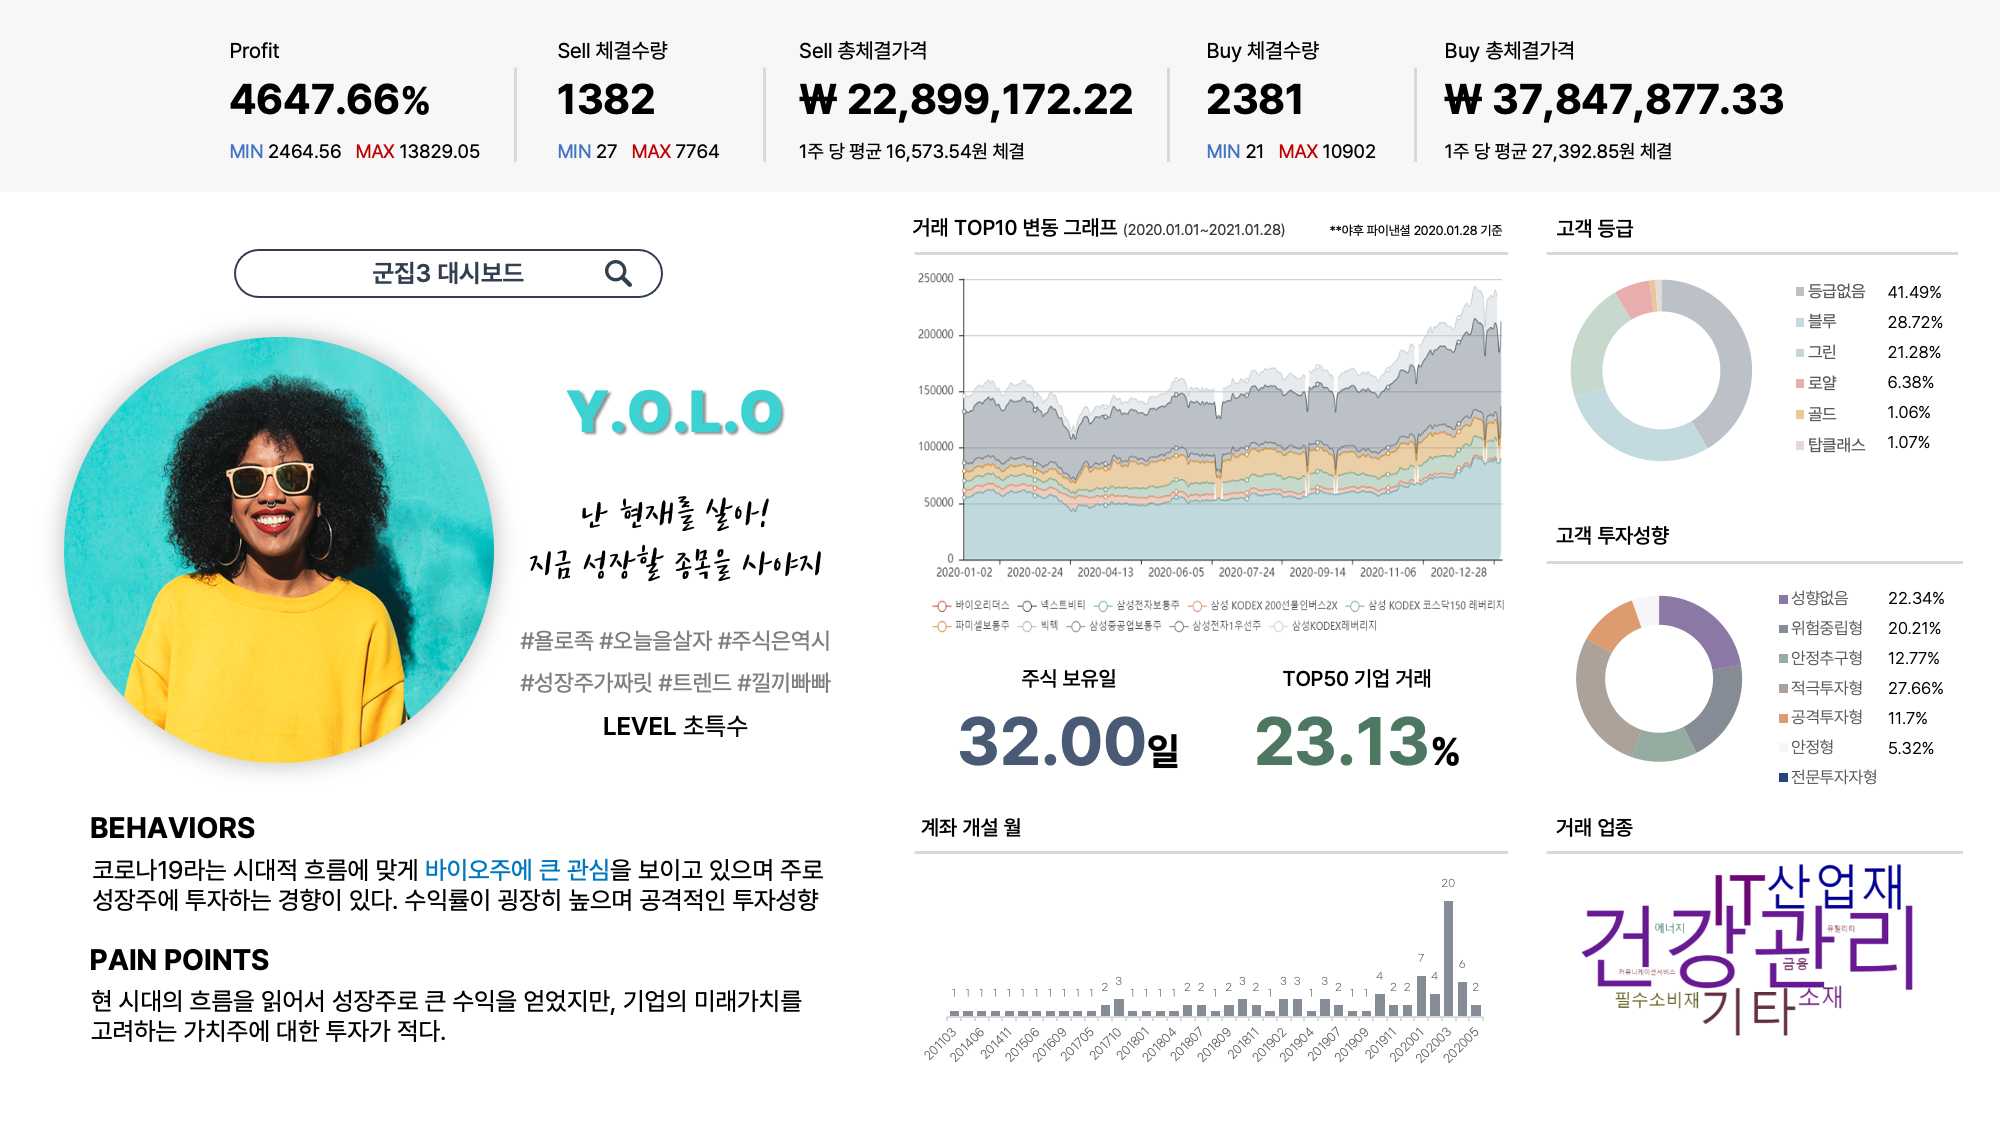

In [53]:
Image("군집별 페르소나.png")

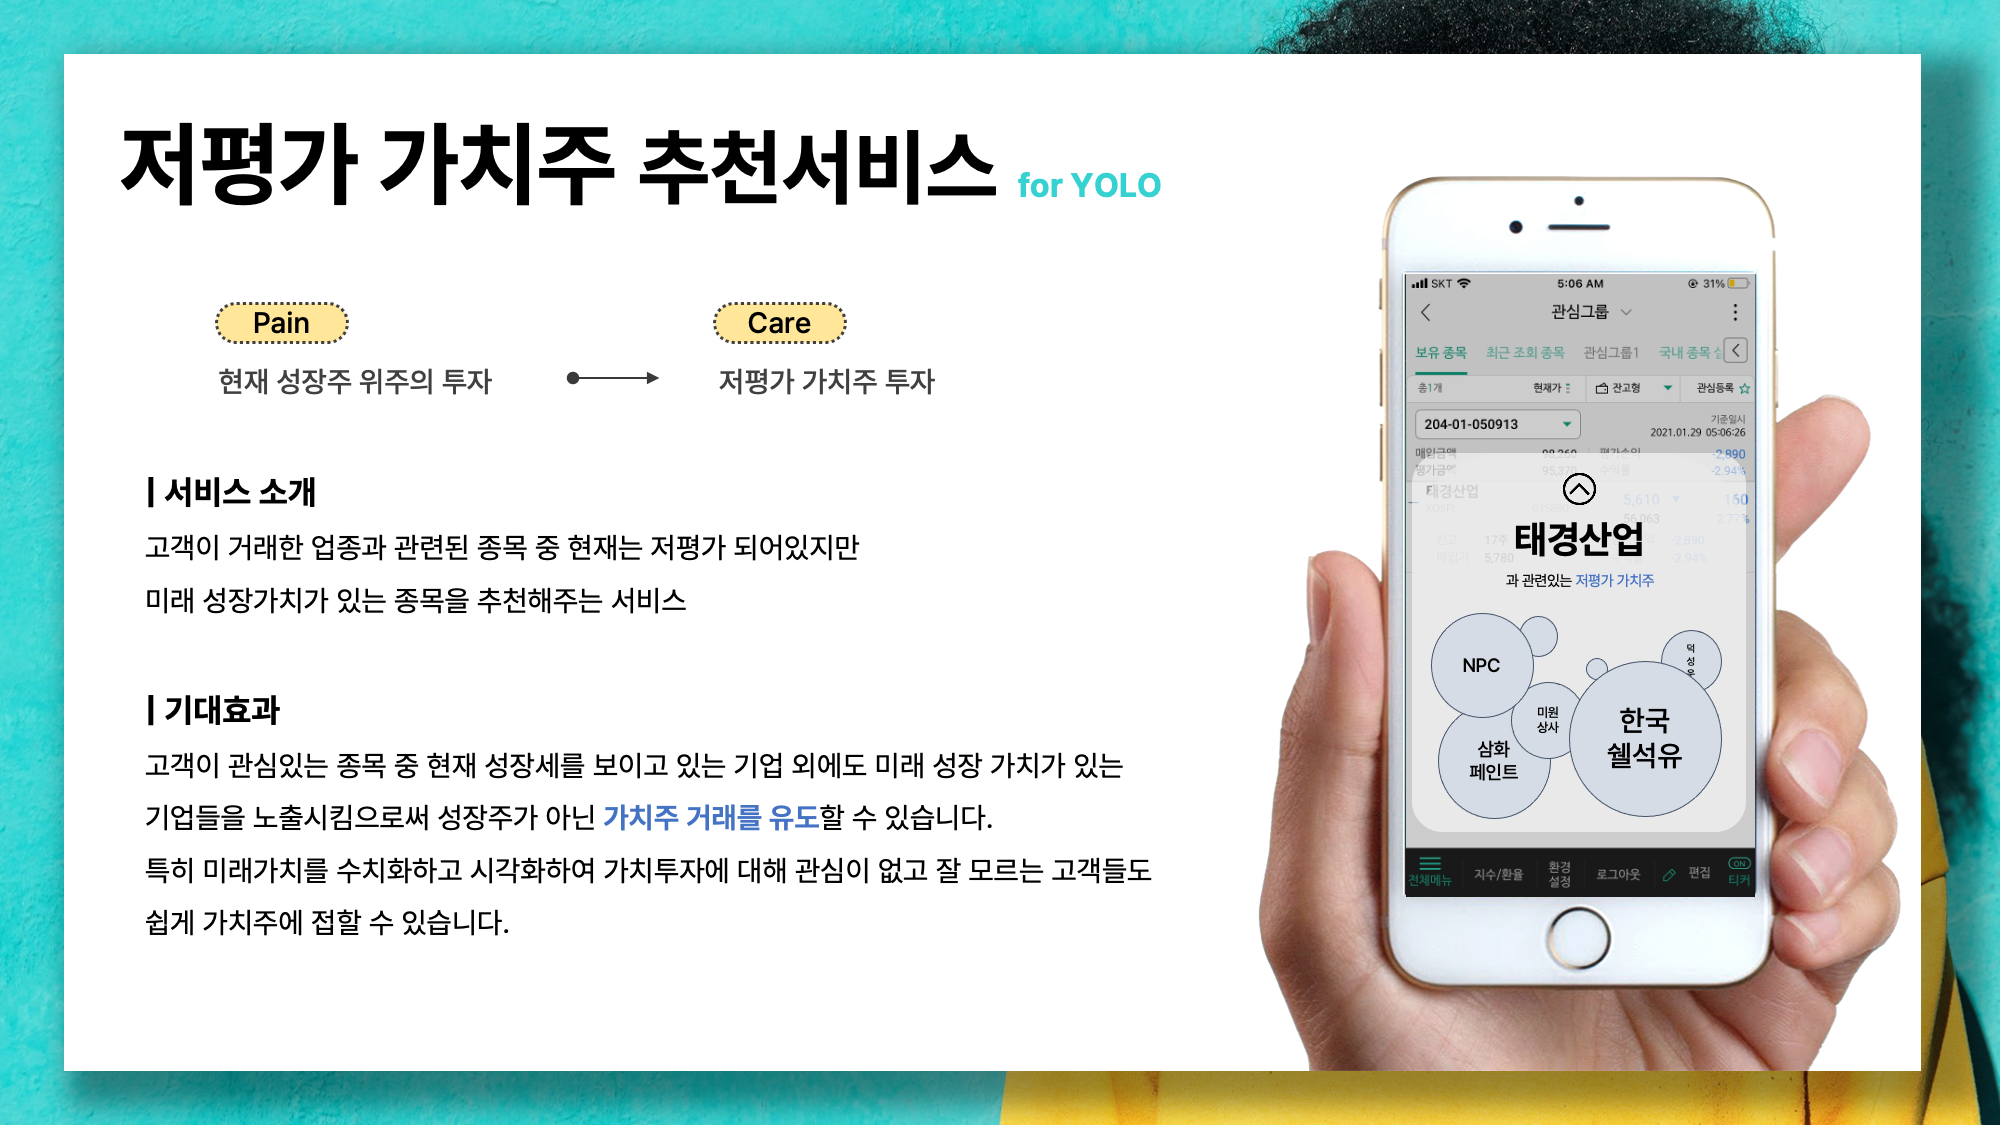

In [51]:
Image("군집별 맞춤 서비스.png")